# Visualization of interpolated satellite measurements

This notebooks aims at plotting generated SSH satellite measurements. 

In [1]:
import matplotlib.pyplot as plt 
import matplotlib
#matplotlib.use('Agg')
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

import numpy as np

from joblib import Parallel
from joblib import delayed as jb_delayed

## 1.) - Data import 

The following cells import the satellite interpolated SSH measurements : 

In [2]:
n_try = 0
while n_try<10:
    try :    
        ### ALTIKA ###
        alg_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/alg/*",combine='nested',concat_dim='time',parallel=True)
        alg_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/alg/*",combine='nested',concat_dim='time',parallel=True)
        alg_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/alg/*",combine='nested',concat_dim='time',parallel=True)

        ### JASON 3 ###
        j3_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/j3/*",combine='nested',concat_dim='time',parallel=True)
        j3_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/j3/*",combine='nested',concat_dim='time',parallel=True)
        j3_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/j3/*",combine='nested',concat_dim='time',parallel=True)

        ### SENTINEL 3A ###
        s3a_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/s3a/*",combine='nested',concat_dim='time',parallel=True)
        s3a_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/s3a/*",combine='nested',concat_dim='time',parallel=True)
        s3a_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/s3a/*",combine='nested',concat_dim='time',parallel=True)

        ### SENTINEL 3B ###
        s3b_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/s3b/*",combine='nested',concat_dim='time',parallel=True)
        s3b_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/s3b/*",combine='nested',concat_dim='time',parallel=True)
        s3b_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/s3b/*",combine='nested',concat_dim='time',parallel=True)

        ### CRYOSAT 2 ###
        c2_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/c2/*",combine='nested',concat_dim='time',parallel=True)
        c2_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/c2/*",combine='nested',concat_dim='time',parallel=True)
        c2_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/c2/*",combine='nested',concat_dim='time',parallel=True)

        ### SWOT NADIR ### 
        swotn_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/swot/*",combine='nested',concat_dim='time',parallel=True)
        swotn_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_nadirs/swot/*",combine='nested',concat_dim='time',parallel=True)
        swotn_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_nadirs/swot/*",combine='nested',concat_dim='time',parallel=True)

        ### SWOT SWATH ### 
        swotw_1 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_swot/*",combine='nested',concat_dim='num_lines',parallel=True).sortby('time')
        swotw_2 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023c_SSHmapping_HF_CenterPacific/dc_obs_swot/*",combine='nested',concat_dim='num_lines',parallel=True).sortby('time')
        swotw_3 = xr.open_mfdataset("/bettik/bellemva/ocean_data_challenge/2023d_SSHmapping_HF_Hawaii/dc_obs_swot/*",combine='nested',concat_dim='num_lines',parallel=True).sortby('time')
        break
    except : 
        print("Opening netcdf file failed, trying again...")
    n_try+=1


Opening netcdf file failed, trying again...


In [9]:
nadirs_1 = xr.concat([alg_1,j3_1,s3a_1,s3b_1,swotn_1],dim='time').sortby('time')
nadirs_2 = xr.concat([alg_2,j3_2,s3a_2,s3b_2,swotn_2],dim='time').sortby('time')
nadirs_3 = xr.concat([alg_3,j3_3,s3a_3,s3b_3,swotn_3],dim='time').sortby('time')

/home/bellemva/miniconda3/envs/pangeo-forge/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 19 times more chunks
  return self.array[key]
/home/bellemva/miniconda3/envs/pangeo-forge/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 19 times more chunks
  return self.array[key]
/home/bellemva/miniconda3/envs/pangeo-forge/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 19 times more chunks
  return self.array[key]
/home/bellemva/miniconda3/envs/pangeo-forge/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 19 times more chunks
  return self.array[key]
/home/bellemva/miniconda3/envs/pangeo-forge/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slici

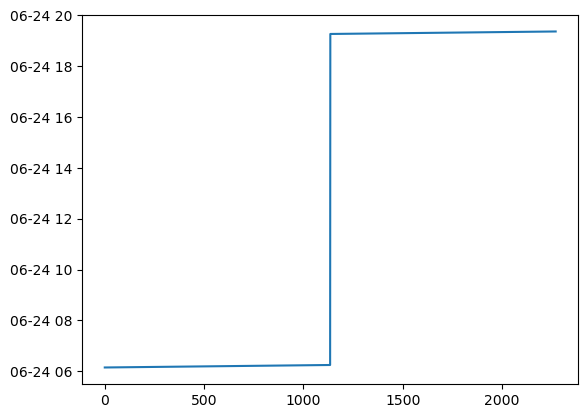

In [13]:
plt.plot(swotw_1_sel.time.values)

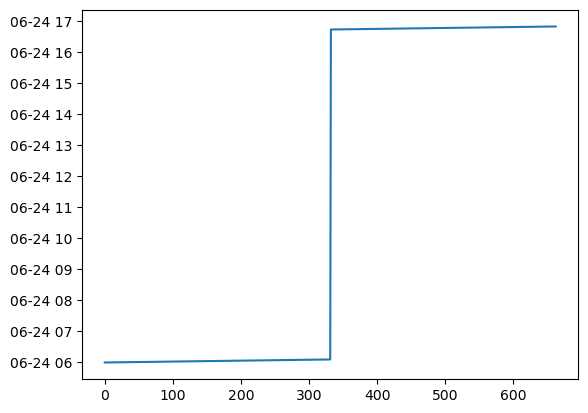

In [14]:
test = xr.open_dataset("/bettik/bellemva/ocean_data_challenge/2023b_SSHmapping_HF_California/dc_obs_nadirs/swot/SSH_NADIR_2012-06-24.nc")
plt.plot(test.time.values)

## 2.) - Plotting

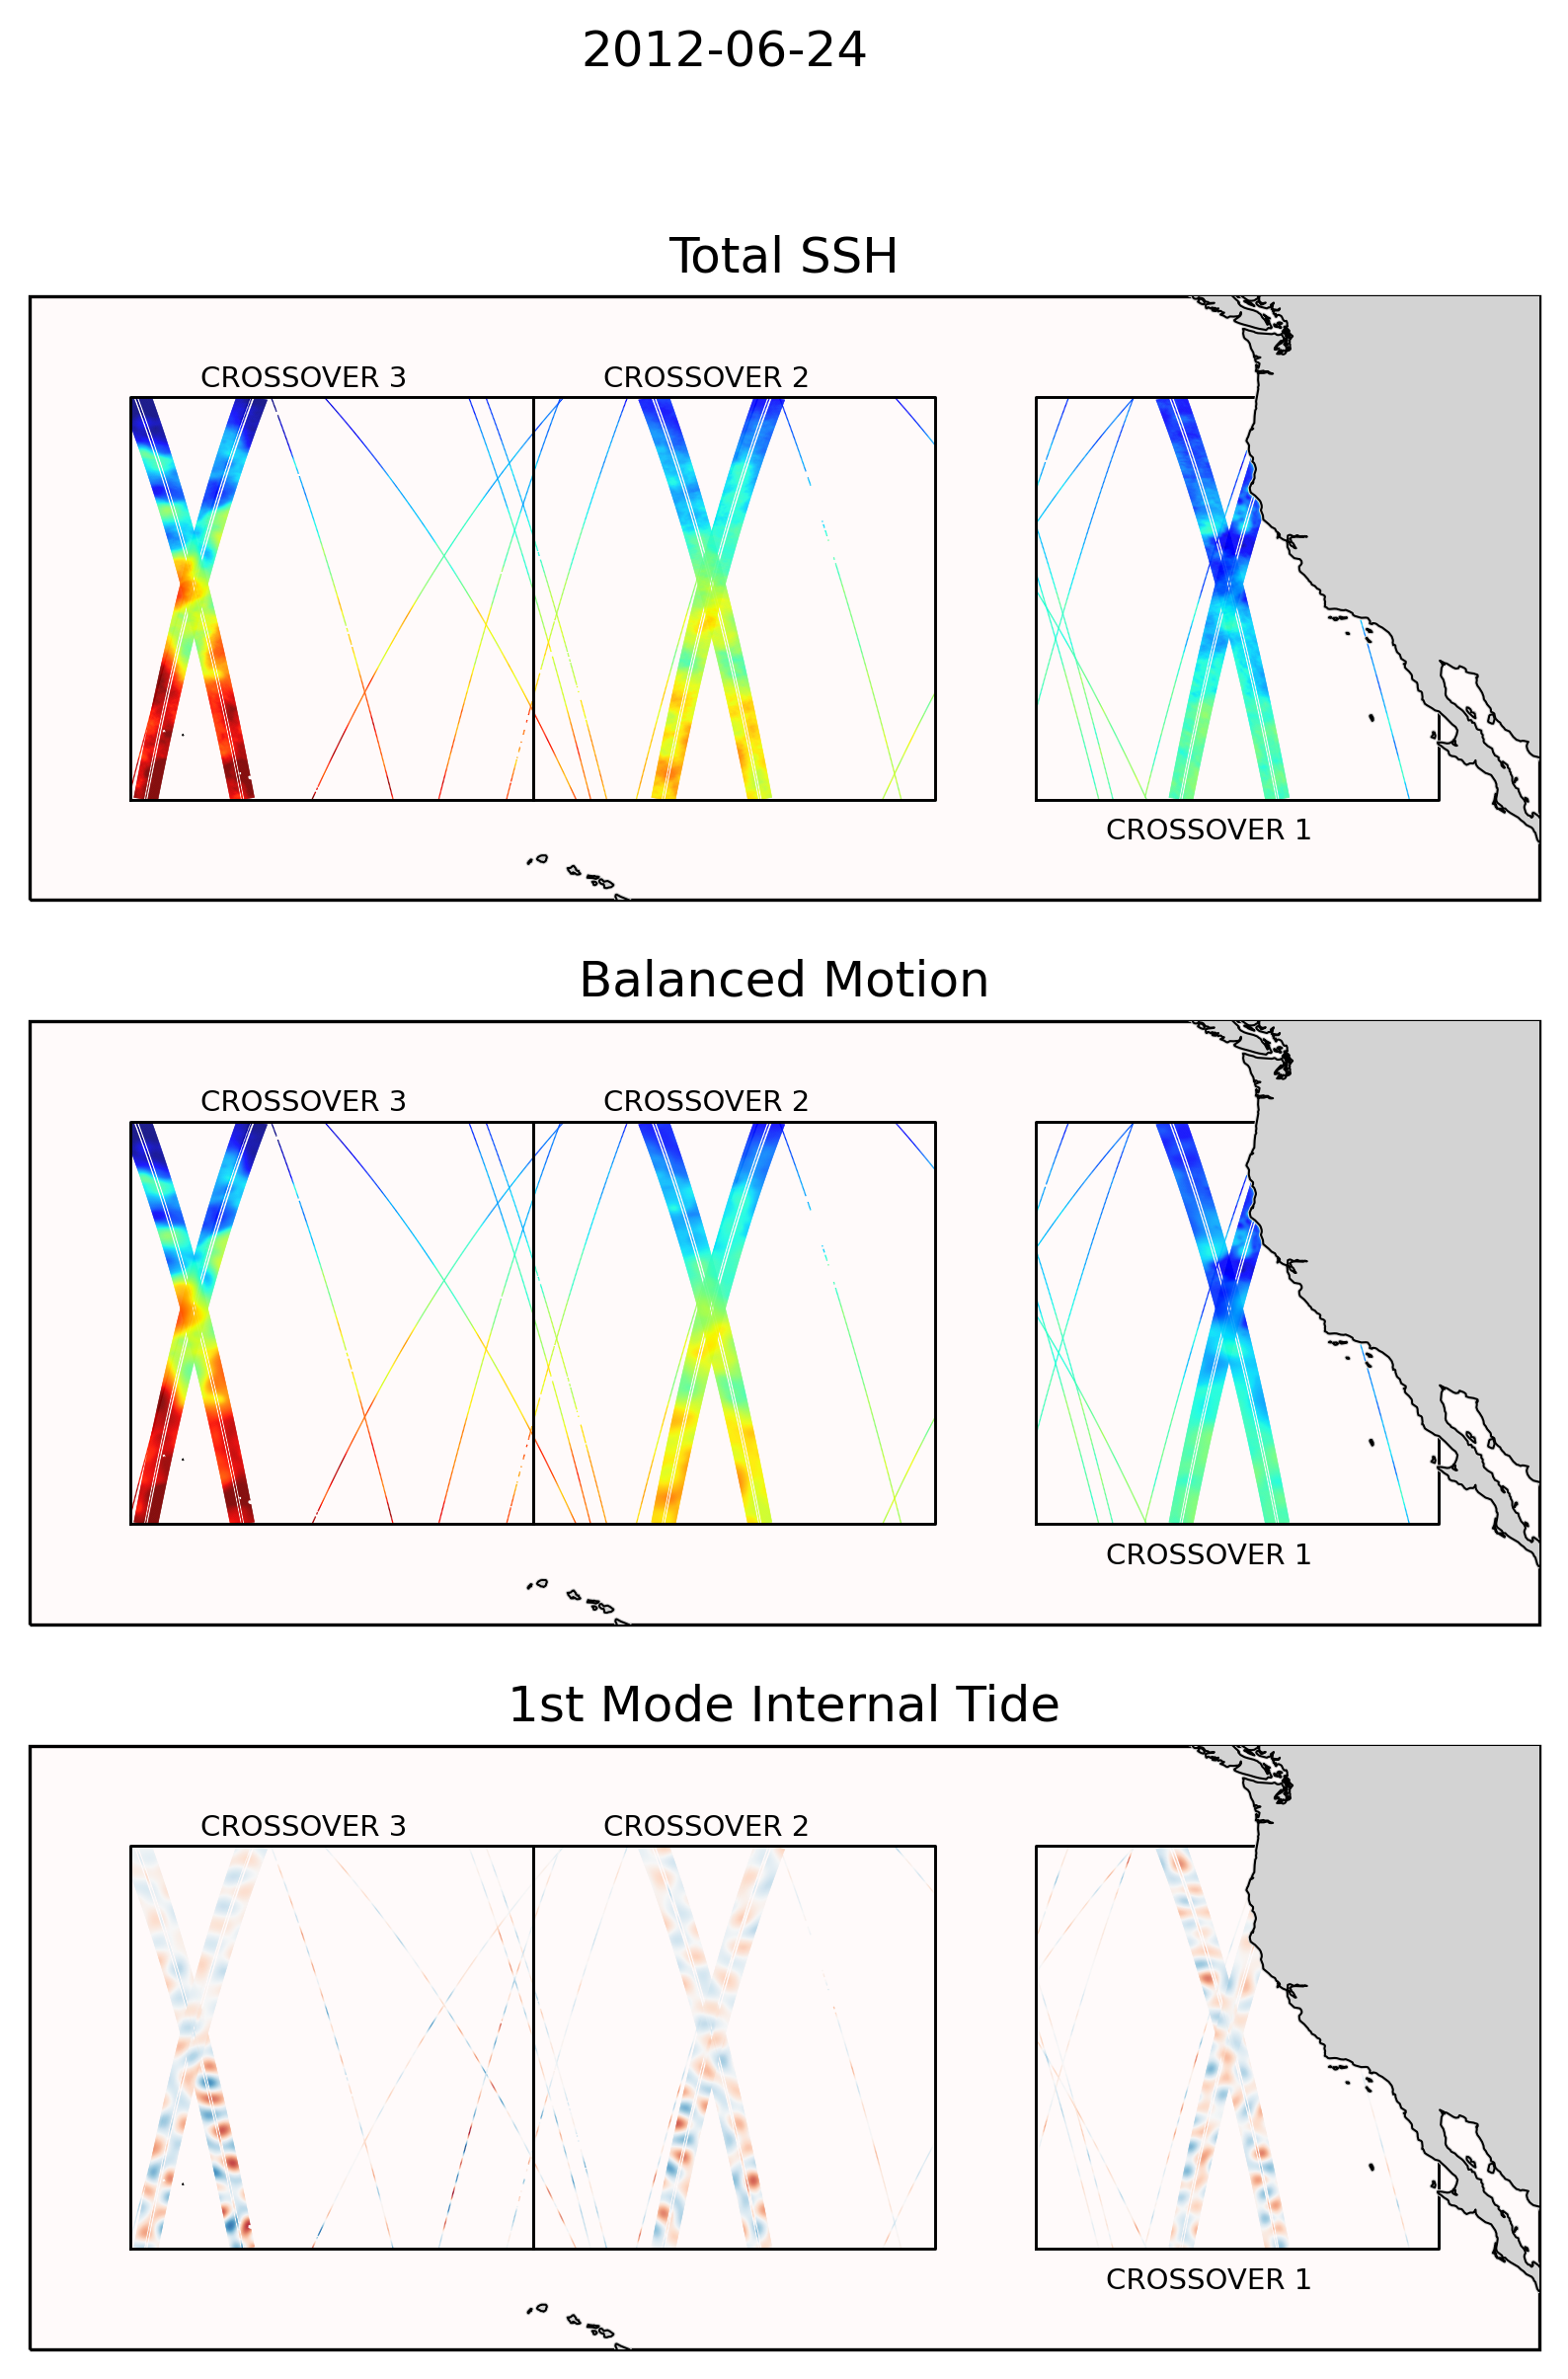

In [10]:
date = np.datetime64("2012-06-24")

fig, ax = plt.subplots(3,1,figsize=(16,9),subplot_kw={"projection": ccrs.PlateCarree(central_longitude=215.)},dpi=300)

fig.suptitle(date.astype('str'))

nadirs_1_sel=nadirs_1.sel(time=slice(np.datetime64(date.astype('str')+"T00"),np.datetime64(date.astype('str')+"T23")),drop=True)
nadirs_2_sel=nadirs_2.sel(time=slice(np.datetime64(date.astype('str')+"T00"),np.datetime64(date.astype('str')+"T23")),drop=True)
nadirs_3_sel=nadirs_3.sel(time=slice(np.datetime64(date.astype('str')+"T00"),np.datetime64(date.astype('str')+"T23")),drop=True)
swotw_1_sel = swotw_1.where((swotw_1.time>np.datetime64(date.astype('str')+"T00"))*(swotw_1.time<np.datetime64(date.astype('str')+"T23")),drop=True)
swotw_2_sel = swotw_2.where((swotw_2.time>np.datetime64(date.astype('str')+"T00"))*(swotw_2.time<np.datetime64(date.astype('str')+"T23")),drop=True)
swotw_3_sel = swotw_3.where((swotw_3.time>np.datetime64(date.astype('str')+"T00"))*(swotw_3.time<np.datetime64(date.astype('str')+"T23")),drop=True)

for ax,title,name,vmin,vmax,cmap in zip([ax[0],ax[1],ax[2]],
                    ["Total SSH","Balanced Motion","1st Mode Internal Tide"],
                    ['ssh','ssh_bm','ssh_it1'],
                    [0.2,0.2,-0.1],[1,1,0.1],
                    ["jet","jet","RdBu_r"]):
    
    for nadirs in [nadirs_1_sel,nadirs_2_sel,nadirs_3_sel]:
        ax.scatter(x=nadirs.longitude,y=nadirs.latitude,c=nadirs[name],marker='.',linewidths=0,s=0.5,vmin=vmin,vmax=vmax,cmap=cmap,transform=ccrs.PlateCarree())
    for swotw in [swotw_1_sel,swotw_2_sel,swotw_3_sel]:
        ax.scatter(x=swotw.longitude,y=swotw.latitude,c=swotw[name],marker='.',linewidths=0,s=0.1,vmin=vmin,vmax=vmax,cmap=cmap,transform=ccrs.PlateCarree())
    
    ax.set_title(title)
    ax.set_extent([175, 250,20, 50],crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.OCEAN,color="snow",zorder=0)
    ax.add_feature(cfeature.LAND.with_scale('50m'),color="lightgrey",zorder=3,edgecolor='none')
    ax.coastlines(lw=0.5,zorder=4,resolution="50m")
    ax.set_aspect("equal")

    ax.plot([180,180,200,200,180],[25,45,45,25,25],transform=ccrs.PlateCarree(),c="black",lw=0.7)
    ax.plot([200,200,220,220,200],[25,45,45,25,25],transform=ccrs.PlateCarree(),c="black",lw=0.7)
    ax.plot([225,225,245,245,225],[25,45,45,25,25],transform=ccrs.PlateCarree(),c="black",lw=0.7)

    ax.text(183.5,45.5,"CROSSOVER 3",transform=ccrs.PlateCarree(),fontsize=7)
    ax.text(203.5,45.5,"CROSSOVER 2",transform=ccrs.PlateCarree(),fontsize=7)
    ax.text(228.5,23,"CROSSOVER 1",transform=ccrs.PlateCarree(),fontsize=7)


Checking if the date of the SWOT Nadir and wide swath are coherent with each other. 

In [13]:
import xarray as xr
import numpy as np
nadir_track = xr.open_dataset("/bettik/bellemva/satellite_track/swot/track_swot_nadir_pacific.nc")
swath_track = xr.open_dataset("/bettik/bellemva/satellite_track/swot/track_swot_pacific.nc")

In [23]:
lon_nadir = nadir_track.longitude.values
lon_swath = swath_track.longitude_nadir.values

In [30]:
idx_nadir = (np.abs(lon_nadir-180)).argmin()

In [31]:
idx_swath = (np.abs(lon_swath-180)).argmin()

In [33]:
swath_track.time[idx_swath].values

numpy.datetime64('2023-01-21T22:39:07.070520704')

In [37]:
nadir_track.time[idx_nadir].values

numpy.datetime64('2023-04-16T09:22:35.739869056')

(array([], dtype=int64),)